In [2]:
pip install tensorflow opencv-python numpy scikit-learn matplotlib idx2numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# -------------------------------------------------------
# 1️⃣ Load dataset (70,000 Images)
# -------------------------------------------------------
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()

# Combine train + test to make a full 70k dataset
X = np.concatenate([x_train_full, x_test_full])
Y = np.concatenate([y_train_full, y_test_full])

print("Total dataset:", X.shape, Y.shape)

Total dataset: (70000, 28, 28) (70000,)


In [5]:
# -------------------------------------------------------
# 2️⃣ 80-10-10 Split (Train - Validation - Test)
# -------------------------------------------------------
# First split into 80% Train & 20% Temp
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Split Temp into 10% Validation + 10% Test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)

Train Set: (56000, 28, 28)
Validation Set: (7000, 28, 28)
Test Set: (7000, 28, 28)


In [6]:
# -------------------------------------------------------
# 3️⃣ Preprocessing
# -------------------------------------------------------
def preprocess(images):
    images = images.astype("float32") / 255.0
    images = np.expand_dims(images, -1)  # (28,28,1)
    return images

X_train = preprocess(X_train)
X_val = preprocess(X_val)
X_test = preprocess(X_test)

Y_train_cat = to_categorical(Y_train, 10)
Y_val_cat = to_categorical(Y_val, 10)
Y_test_cat = to_categorical(Y_test, 10)

In [8]:
# -------------------------------------------------------
# 4️⃣ Build CNN Model
# -------------------------------------------------------
cnn_digits = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_digits.compile(optimizer="adam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

In [9]:
# -------------------------------------------------------
# 5️⃣ Train the model
# -------------------------------------------------------
history = cnn_digits.fit(
    X_train, Y_train_cat,
    epochs=5,
    validation_data=(X_val, Y_val_cat)
)

Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.9569 - loss: 0.1459 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9843 - loss: 0.0495 - val_accuracy: 0.9806 - val_loss: 0.0629
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9824 - val_loss: 0.0548
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9847 - val_loss: 0.0510
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9860 - val_loss: 0.0527


In [10]:
# -------------------------------------------------------
# 6️⃣ Evaluate Model on Test Set
# -------------------------------------------------------
loss, accuracy = cnn_digits.evaluate(X_test, Y_test_cat, verbose=0)
print(f"\n✅ Final Test Accuracy: {accuracy*100:.2f}%")


✅ Final Test Accuracy: 98.46%


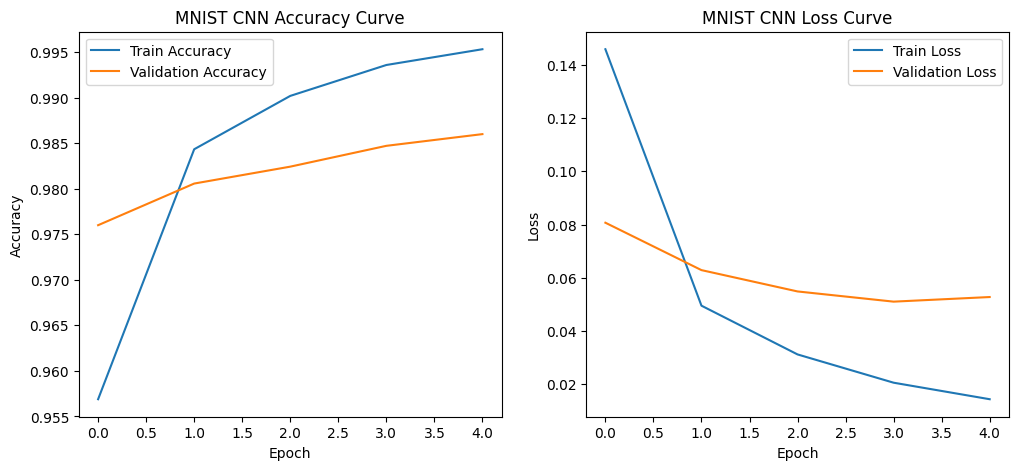

In [12]:

# 8️⃣ Plot Accuracy & Loss Curves
# -------------------------------------------------------
plt.figure(figsize=(12, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("MNIST CNN Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("MNIST CNN Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


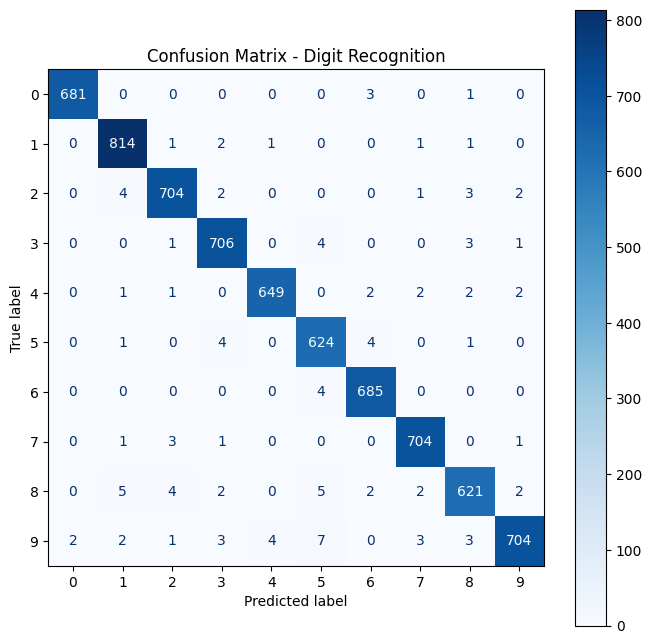

In [13]:
# -------------------------------------------------------
# 9️⃣ Confusion Matrix
# -------------------------------------------------------
Y_pred_probs = cnn_digits.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_test_cat, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Digit Recognition")
plt.show()

In [14]:
# -------------------------------------------------------
# 7️⃣ Save Model
# -------------------------------------------------------
cnn_digits.save("amount.keras")
print("✅ Model saved successfully as: amount.keras")


✅ Model saved successfully as: amount.keras
